In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


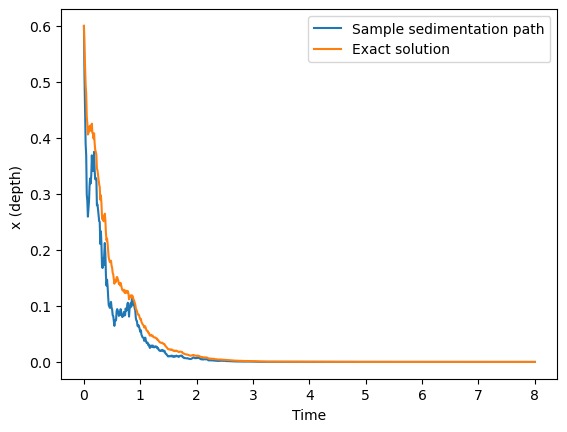

In [4]:
def generate_wiener_process(T, steps):
    W_0 = 0
    dW = rng.normal(0, np.sqrt(T / steps), steps)
    dW = np.insert(dW, 0, W_0, axis=0)
    W = np.cumsum(dW, axis=0)
    return W



def sedimentation_milstein(m, g, gamma, D, t, x_0):
    # Initialising  time based variables
    
    x = np.zeros_like(t, dtype=float)
    h = t[2] - t[1]
    x[0] = x_0
    
   
    # Simplifying the input parameters
    
    k = -m * g / gamma    # Set the drift coefficient as k
    db_dx = D             # set db/dx

    # Generate the random walk using Milstein
    # The Wiener process has mean 0 and stanard deviation sqrt(h)
    
    for r in range(len(t) - 1):
        dW = np.sqrt(h) * rng.normal()

        x[r + 1] = x[r] + k * h * x[r] + D * x[r] * dW \
                   + 0.5 * x[r] * (D ** 2) * (dW ** 2 - h)
    return x


# Set up random number generator (with seed if wanted)
rng = np.random.default_rng(8)

# Parameters
x_0 = 0.6  # Initial value. Note larger positive x values mean greater depth 
m = 0.1
gamma = 0.5  # This represents drag so is negative
g = 10    # g is positive because it acts in the direction of increasing depth
D = 0.8

# Time discretisation
T = 8
dt = 0.01   # Use the standard time step
steps = int(T / dt)
time = np.linspace(0, T, steps + 1)

x_values = sedimentation_milstein(m, g, gamma, D, time, x_0)

# Exact Solution
mu = -m * g / gamma
sigma = 0.3

rng = np.random.default_rng(8)

W = generate_wiener_process(T, steps)
x_exact = x_0 * np.exp((mu - 0.5 * sigma ** 2) * time + (sigma * W))

# Plot the process
plt.plot(time, x_values, label='Sample sedimentation path')
plt.plot(time, x_exact, label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x (depth) ')
plt.legend();

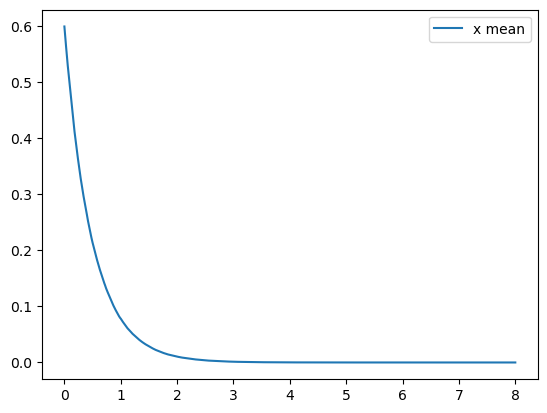

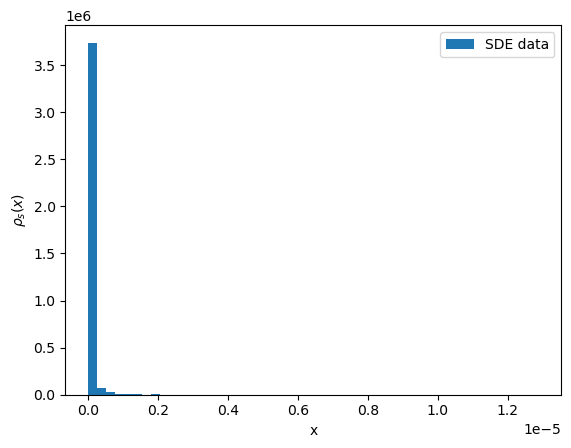

In [5]:


# Time discretisation
T = 8
dt = 0.01
steps = int(T / dt)
time = np.linspace(0, T, steps + 1)

# Generate different samples
samples = 5000

end_values = np.zeros(samples)

mean = np.zeros(steps + 1)
mean_sq_d = np.zeros(steps + 1)
for i in range(samples):
    x = sedimentation_milstein(m, g, gamma, D, time, x_0)  #Uses parameters from (c)
    mean += x
    end_values[i] = x[-1]
    #print('i = ', i, end_values[i])

mean = mean / samples

#plt.plot(time, mean_sq_d, label='<$x^2$>')
plt.plot(time, mean, label='x mean')
plt.legend()
plt.show()

# Plot histogram
h = plt.hist(end_values, bins=50, density=True, label='SDE data')
plt.xlabel('x')
plt.ylabel(r'$\rho_s(x)$')
plt.legend();

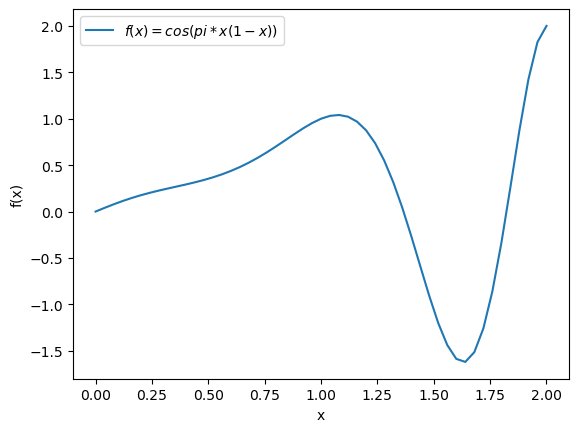

Monte Carlo Integrals:
n = 100, integral = 0.5167, 95% confidence interval [0.192, 0.842]std dev = 0.162
n = 1000, integral = 0.4469, 95% confidence interval [0.345, 0.549]std dev = 0.0512
n = 10000, integral = 0.4595, 95% confidence interval [0.427, 0.492]std dev = 0.0162
n = 100000, integral = 0.4614, 95% confidence interval [0.451, 0.472]std dev = 0.00512


Quad integral

quad integral = 0.4569318318821424 with error 2.6239928336671726e-12
Analytical calculation

analytical result = [0. 0. 0. ... 0. 0. 0.]

for a = 0 and b large, estimate 1/(2) = 0.5


In [8]:


def f(x):
    return x * np.cos(np.pi * x*(1-x))




# Define the limits of integration (a lower, b upper)
b = 2
a = 0

#Let's plot the function
s = np.linspace(a, b, 51)
plt.plot(s, f(s), label='$f(x) = cos(pi*x(1-x))$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


#Set up random number generator 
rng = np.random.default_rng(43)

#Choose sample sizes
n = np.array([100, 1000, 10000, 100000])

#For each sample size, calculate the Monte Carlo integral and output results
print ('Monte Carlo Integrals:')
for j in n:
    x = rng.uniform(a, b, size=j)
    y = (b - a) * f(x)
    I_1 = np.mean(y)
    I_std = np.std(y, ddof=1) / np.sqrt(j)

    print(f'n = {j}, integral = {I_1:.4}, 95% confidence interval '
      f'[{I_1 - 2 * I_std:.3}, {I_1 + 2 * I_std:.3}]'
     f'std dev = {I_std:.3}')
     
#Now check it with a (deterministic) numerical integration function in Python 
print()
# Use quad to evaluate each integral
quad_integral, err = quad(f, a, b)
print()
print('Quad integral')
print()
print(f'quad integral = {quad_integral} with error {err}')

#Now print algebraic result 
print('Analytical calculation')
print()
print(f'analytical result = {1/(2)*(np.cos(np.pi *x*(1-x)) - np.cos(np.pi * x*(1-x)))}')
print()
print(f'for a = 0 and b large, estimate 1/(2) = {1/(2)}')